# Chapter 6. AI 기초 - Regression 2
* 교재 : 으뜸 머신러닝(생능출판)
* 출처 : https://www.booksr.co.kr/product/9788970503691/

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 다변량 

# 예측하려는 값과 상관관계가 있는 데이터만 입력으로 사용, 이를 파악하기위해 판다스 라이브러리의 corr() 함수 사용해
# 상관행렬 (corelation matrix) 형상

# ex) Life expectancy 를 상관계수값을 뽑아서. 확인. 

# 피어슨 상관계수 (Pearson corelation coefficient) 두변수사의의 선형적 상관관계를 측정하는 통계적 척도.
# 두변수간 상관관계를 수치로 표현해 변수들이 얼마나 강하게 연관되어있는지 알려줌
#(피어슨 상관계수는 1에 가까울수록 두변수는 양의 선형 상관관계 한쪽 증가로 인해 다른한쪽 증가,
#                 -1에 가까울수록 음의 성형관계 한쪽 증가에따라 다른한쪽 감소 , 0에 가깔울소록 관계가 거이없음.)


#표준편차,- > 정규분포 가운데가 뽈록튀어나온 그래프 , 이 그래프의 폭이 넓을수록, 분산이크고 좁을수록 그래프가 좁아짐.
# 정규분포 정가운데서  a (시그마) 와 -a ( - 시그마 ) 만큼 (약 68.2%) 가 표준편차. 의범위. 

# a^2 (시그마의 제곱) 은 분산을 나타냄. (데이터가 평균으로부터 얼마나 퍼저있는지를 나타내는 척도.)


# 1. Feature Selection

In [7]:
data = pd.read_csv('C:/Users/carlo/Desktop/AI_CWNU/documents/boston.csv') #pandas의 read_csv 함수.  boston.csv 를 불러서data에 선언
data.head(3) #상위 3개 보여줌.

,ID,TOWN,TOWNNO,TRACT,LON,LAT,x,y,MEDV,CMEDV,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.0,0.0,2011.0,-70.955,42.2550,338.73,4679.73,24.0,24.0,...,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,2.0,0.0,1.0,2021.0,-70.950,42.2875,339.23,4683.33,21.6,21.6,...,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,3.0,0.0,1.0,2022.0,-70.936,42.2830,340.37,4682.80,34.7,34.7,...,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


## Correlation
* 상관계수가 0.3 보다 작으면 상관관계가 약하다고 판단
* 상관계수가 0.3 보다 크면 상관관계가 있다고 판단
* 상관계수가 0.7 보다 크면 강한 상관관계가 있다고 판단

### Heatmap

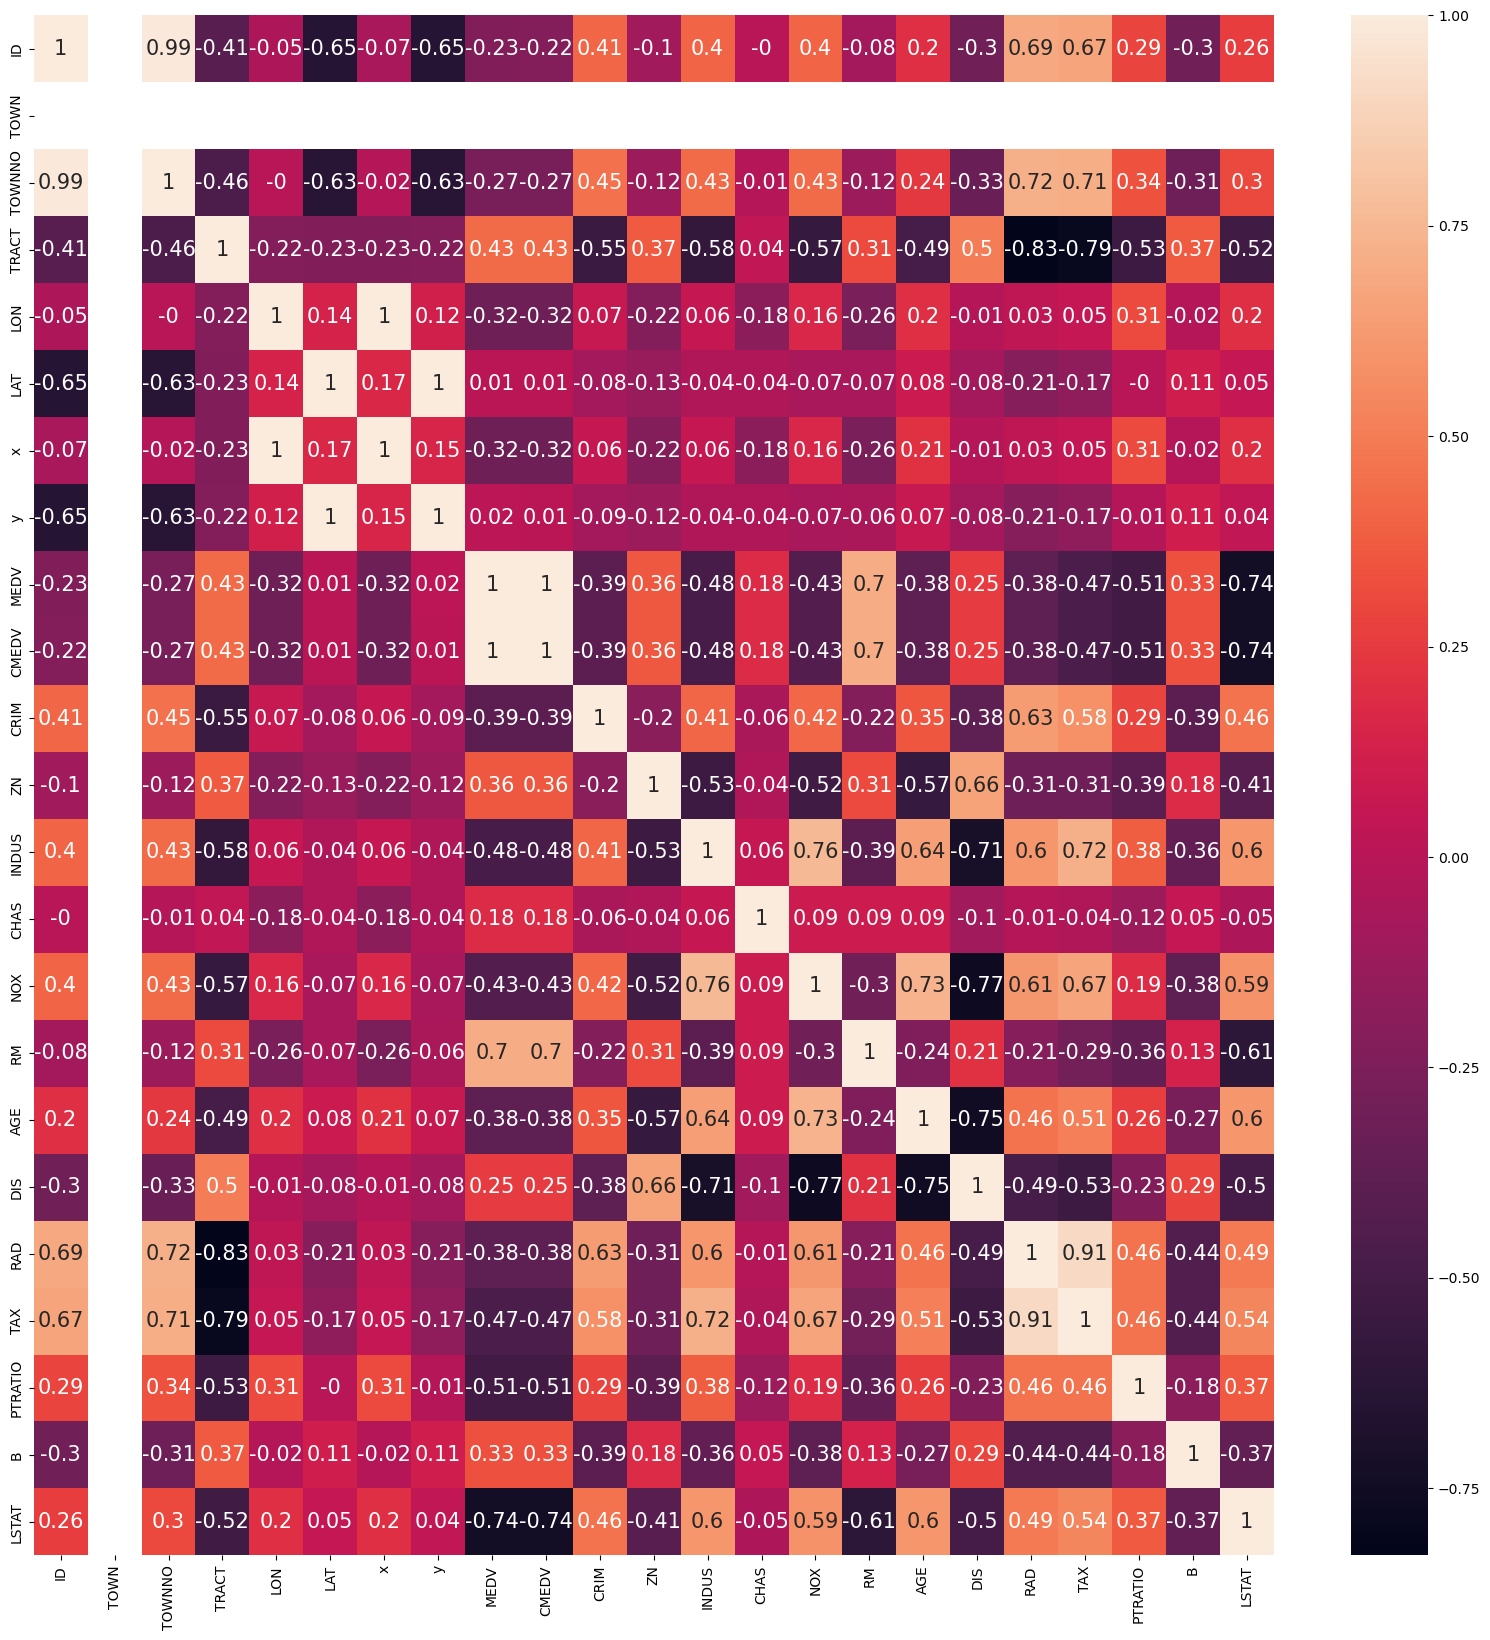

In [13]:
plt.figure(figsize = (20,20)) #그림판 열고 사이즈 20 , 20 으로 

sns.heatmap(data.corr().round(2), annot = True, annot_kws = {"fontsize":15})
# seaborn에 라이브러리에 heatmap 그리는데,  data의 corelation 상관관계를 나타냄.  이걸 모든값을 0.00 까지 반올림, 
# annot=True 각 셀에 상관계수 값을 표시. 상관계수 값은 셀 위에 작은 숫자로 표시.
#annot_kws = {"fontsize":15}) fontsize 를 15로 설정 

plt.show() 

### 3-Dimension Scatter Plot

In [17]:
X = data[['LSTAT','RM']]
y = data['MEDV']

In [18]:
# 각도 조절
%matplotlib qt5

In [19]:
#위에꺼 실행하고 이렇게하면 돌릴수있음 3D 
fig = plt.figure(figsize = (15,15))

#3차원 plot
ax = fig.add_subplot(111,projection  = "3d" )

#3차원이라 X Y Z 축
ax.scatter(X["LSTAT"], X["RM"], y)
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

fig.show()

In [7]:
# 각도 조절 해제
%matplotlib inline

## Plot Surface
* https://matplotlib.org/stable/gallery/mplot3d/surface3d.html

In [8]:
x.shape

(506, 2)

* 앞의 506은 데이터 수로 바뀌어도 괜찮지만 뒤의 2는 Feature의 수로 바뀌면 안된다.

### Multivariate Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [22]:
pf = PolynomialFeatures(degree = 2) # 2차항식
X_pf = pf.fit_transform(X) # fit_transform 메서드는 입력 데이터를 기반으로 다항식 특성을 생성.

#모델
lr = LinearRegression()

#예측학습
lr.fit(X_pf,y)


LinearRegression()

In [30]:
xx = np.arange(0,40,1).reshape(-1,1)# LSTAT
yy = np.arange(0,10,0.25).reshape(-1,1) # RM  #갯수가 틀려서 1~ 40 40개로 만들려면 0.25씩올려줘야함

#두개를 합쳐줌
# np.concatenate([xx,yy], axis = 1)

#그걸 넣어줌 . 
zz = lr.predict(pf.transform(np.concatenate([xx,yy], axis = 1)))


In [31]:
xx, yy = np.meshgrid(xx, yy)
zz = lr.predict(pf.transform(np.concatenate([xx.reshape(-1,1), yy.reshape(-1,1)], axis = 1))).reshape(-1,1)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X["LSTAT"], X["RM"], y)
ax.plot_surface(xx, yy, zz.reshape(xx.shape), cmap="coolwarm", alpha=0.8)

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

plt.show()

print(zz.shape) 

(1600, 1)


### 3-Dimension Scatter Plot

In [26]:
# 각도 조절
%matplotlib qt5

In [27]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['LSTAT'],x['RM'],y)

ax.plot_surface(xx, yy, zz.reshape(xx.shape), color = None, rstride = 1, cstride = 1, alpha = 0.3)

ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

plt.show()

In [32]:
# 각도 조절 해제
%matplotlib inline

# 2. Standardization(표준화)
* 각각의 독립변수의 단위가 다를 때 적절한 학습이 이루어지지 않을 수 있음
* 따라서 각각의 독립변수를 적당한 규모로 변경하기 위해 표준화 진행
* Normalization(정규화)도 Standardization(표준화)와 같은 방법
* 실제로는 Standardization(표준화)를 많이 활용

## Data Split

In [33]:
from sklearn.model_selection import train_test_split
#model_selection ->  데이터셋을 훈련 및 테스트 세트로 분할하는 데 사용
# train_test_split -> 
from sklearn.preprocessing import StandardScaler as SS, MinMaxScaler as MS

#sklearn.preprocessing 모듈은 데이터 전처리를 위한 여러 유틸리티 함수와 클래스를 제공
#StandardScaler와 MinMaxScaler는 데이터를 표준화(Standardization) 또는 정규화(Normalization)하는 데 사용되는 스케일러

# StandardScaler (SS): 
#주어진 데이터를 평균이 0이고 표준 편차가 1인 분포로 변환. 
#각 특성의 값들을 평균에서 빼고 표준 편차로 나누어 스케일링함.

# MinMaxScaler (MS): 주어진 데이터를 최소값이 0, 최대값이 1이 되도록 변환. 
#각 특성의 최소값과 최대값을 이용하여 값을 재조정.

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# 여기에서 각 매개변수의 역할을 설명

# X: 독립 변수 (feature)로 구성된 데이터 배열 또는 데이터프레임.

# y: 종속 변수 (target)로 구성된 데이터 배열 또는 데이터프레임.

# test_size: 테스트 세트의 비율을 나타내는 부동 소수점 숫자 또는 정수임.
#기본값은 0.25이며, 전체 데이터의 25%가 테스트 세트로 사용됨.

# random_state: 데이터를 분할할 때 사용되는 난수 초깃값.
# 이를 통해 분할 과정을 재현할 수 있음. 동일한 random_state 값을 사용하면 동일한 분할 결과를 얻을 수 있음. 
#기본값은 None으로, 매번 다른 결과를 생성함.

## Modeling

In [36]:
pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X_train)

lr_model = LinearRegression()
lr_model.fit(X_pf, Y_train)

LinearRegression()

## Evaluate

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
pred = lr_model.predict(pf.transform(X_test)) #테스트데이터셋을 다항식으로 변환한걸 lr 모델에 에측한값을 pred에 선언

print('Before Scaling')
print('MSE : {:.4f}'.format(mean_squared_error(Y_test, pred))) #MSE 계산. 

Before Scaling
MSE : 23.8056


## Scaling
* 데이터 분포를 보고 특정한 범위 없이 정규분포의 형태를 띄고 있으면 StandardScaler를 사용
* StandardScaler ex : 키(특정한 범위 없이 정규분포를 가지기 때문)
* 데이터 분포를 보고 특정한 범위를 가지고 있으면 MinMaxScaler를 사용
* MinMaxScaler ex : 시험(정규분포를 따르지만 0점부터 100점이라는 범위를 가지기 때문)

### StandardScaler

In [ ]:
# 일반적으로 데이터의 분포가 정규분포에 가까운 경우에는 StandardScaler를 사용
# 데이터의 범위를 0과 1 사이로 제한하고자 할 때에는 MinMaxScaler를 사용하는 경향이 있음

In [21]:
# StandardScaler
ss = SS()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X_train_ss)

lr_model = LinearRegression()
lr_model.fit(X_pf, Y_train)

pred = lr_model.predict(pf.transform(X_test_ss))

print('After Standard Scaling')
print('MSE : {:.4f}'.format(mean_squared_error(Y_test, pred)))

After Standard Scaling
MSE : 23.8056


* 원래는 평균적으로 성능이 더 좋아지지만 현재 데이터에서는 변화가 없는 것으로 확인

### MinMaxScaler

In [22]:
# MinMaxScaler
ms = MS()
X_train_ms = ms.fit_transform(X_train)
X_test_ms = ms.transform(X_test)

pf = PolynomialFeatures(degree = 2)
X_pf = pf.fit_transform(X_train_ms)

lr_model = LinearRegression()
lr_model.fit(X_pf, Y_train)

pred = lr_model.predict(pf.transform(X_test_ms))

print('After MinMax Scaling')
print('MSE : {:.4f}'.format(mean_squared_error(Y_test, pred)))

After MinMax Scaling
MSE : 23.8056


* 마찬가지로 평균적으로 성능이 더 좋아지지만 현재 데이터에서는 변화가 없는 것으로 확인

# 3. Regularized Regression
* 과적합을 피하기 위한 방법
* Ridge, Lasso : 모델 항의 수를 줄이기 위한 방법

## Data
* https://archive.ics.uci.edu/ml/datasets/Wine

In [47]:
from sklearn.datasets import load_wine 
import pandas as pd

wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

wine_df.columns = ['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
wine_df.head(3)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [50]:
data = wine_df

## Data Split

In [51]:
Y = data['class']
X = data.drop('class', axis = 1)

print(X.shape, Y.shape)

(178, 13) (178,)


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    # 각 클래스를 랜덤하게 뽑도록 설정
                                                    stratify = Y,
                                                    random_state = 0)
#클래스 불균형이 있는 데이터셋에서는 stratify=Y를 사용하여 데이터를 분할하는 것이 일반적으로 좋은 방법
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(124, 13) (124,)
(54, 13) (54,)


## Scaling

### StandardScaler

In [27]:
ss = SS()
ss.fit_transform(X_train)

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## Modeling

In [28]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr_model = LogisticRegression(solver = 'liblinear',
                              multi_class = 'auto',
                              # 규제 강도 alpha = C
                              C = 1,
                              penalty = 'l1',
                              random_state = 0)
lr_model.fit(X_train_ss, Y_train)

# L1 규제는 머신러닝 모델에서 사용되는 규제(regularization) 방법 중 하나입니다. 
#규제는 모델의 복잡도를 조절하여 과적합(overfitting)을 방지하고, 일반화 성능을 향상시키는 목적으로 사용됩니다.

# L1 규제는 모델의 가중치(weight)를 0에 가깝게 만드는 특징을 가지고 있습니다.
#이를 통해 모델이 특성 선택(feature selection)을 수행, 중요한 특성들을 식별하고 나머지 특성들은 무시하는 효과를 얻을 수 있습니다.
#L1 규제는 가중치 벡터의 L1 노름(norm)을 규제항(regularization term)으로 추가하여 모델의 손실 함수(loss function)을 정의합니다.

# L1 규제를 사용하는 경우, 일부 특성의 가중치가 0이 되거나 매우 작아지는 특성 선택의 효과를 가져옵니다.
#이는 모델의 해석력을 향상시킬 수 있으며, 특성의 중요도를 알 수 있습니다. 또한,
#특성 선택을 통해 모델의 복잡도를 줄여 연산 비용을 감소시킬 수 있습니다.

# L1 규제는 Lasso 회귀와 같은 알고리즘에서 주로 사용됩니다. Lasso 회귀는 선형 회귀 모델에 L1 규제를 적용한 것으로, 
#변수 선택과 모델의 일반화를 동시에 수행할 수 있습니다.

# 즉, L1 규제는 모델의 가중치를 0에 가깝게 만들어 특성 선택과 모델의 복잡도 조절을 동시에 수행하는 방법입니다.

SyntaxError: invalid decimal literal (3607244333.py, line 11)

## Evaluate

In [30]:
lr_model.score(X_test_ss, Y_test)

1.0

* 1.0 : test 데이터를 넣었을 때 100% 맞춘다는 의미
* 실제로 100% 맞추는 경우는 거의 없음

## Lasso Regression

In [31]:
# 가중치(절편)
weights = []
# 규제항
params = []
score = []

for c in range(-4, 6) :
    lr_model = LogisticRegression(solver = 'liblinear',
                              multi_class = 'auto',
                              # 규제 강도 alpha = C
                              C = 10**c,
                              penalty = 'l1',
                              random_state = 0)
    lr_model.fit(X_train_ss, Y_train)
    
    weights.append(lr_model.coef_[1]) # 클래스 3개 중 하나만 확인
    params.append(10**c)
    score.append(lr_model.score(X_test_ss, Y_test))

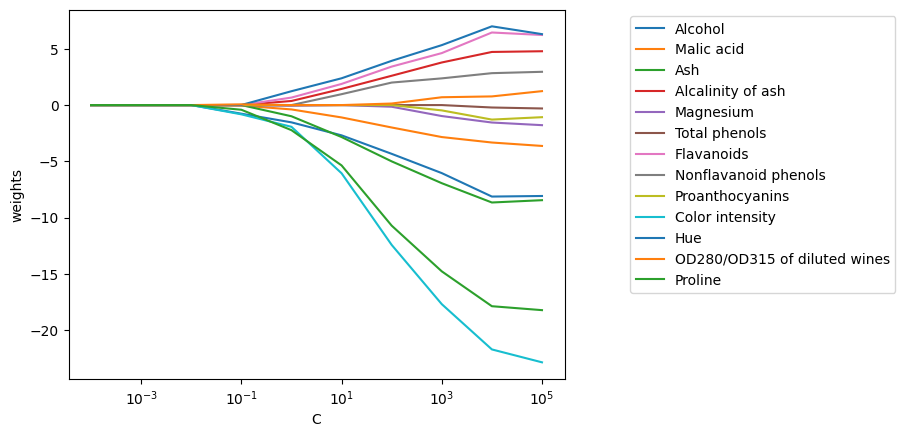

In [32]:
weights = np.array(weights) # 슬라이싱을 위한 변환

fig = plt.figure()

ax = plt.subplot(111)

for col in range(len(data.columns[1:])) :
    plt.plot(params, weights[:, col], label = data.columns[col + 1])

plt.xlabel('C')
plt.ylabel('weights')
plt.xscale('log')

ax.legend(loc = 'upper center', bbox_to_anchor = (1.4,1.0), ncol = 1, fancybox = True)
plt.show()

* Nonflavanoid phenols가 가장 0에 빨리 수렴하는 것을 확인
* 먼저 0에 수렴할수록 제외해도 괜찮은 변수

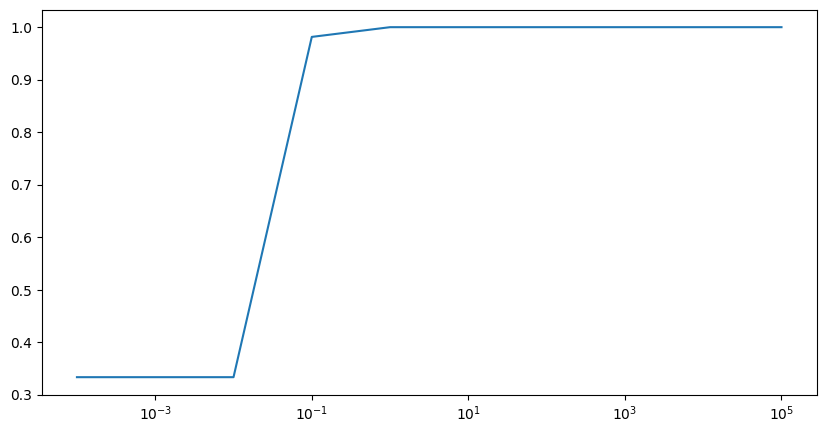

In [33]:
plt.figure(figsize = (10, 5))

plt.plot(params, score)

plt.xscale('log')

plt.show()

## Ridge Regression

In [34]:
# 가중치(절편)
weights = []
# 규제항
params = []
score = []

for c in range(-4, 6) :
    lr_model = LogisticRegression(solver = 'liblinear',
                              multi_class = 'auto',
                              # 규제 강도 alpha = C
                              C = 10**c,
                              penalty = 'l2',
                              random_state = 0)
    lr_model.fit(X_train_ss, Y_train)
    
    weights.append(lr_model.coef_[1]) # 클래스 3개 중 하나만 확인
    params.append(10**c)
    score.append(lr_model.score(X_test_ss, Y_test))

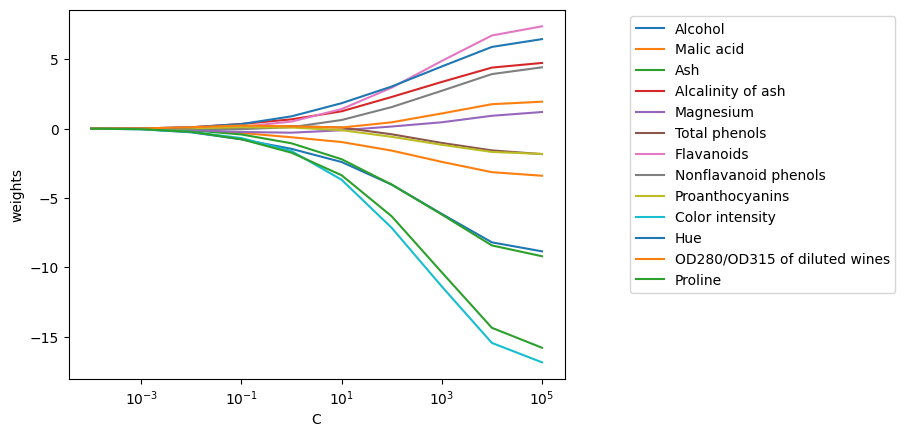

In [35]:
weights = np.array(weights) # 슬라이싱을 위한 변환

fig = plt.figure()

ax = plt.subplot(111)

for col in range(len(data.columns[1:])) :
    plt.plot(params, weights[:, col], label = data.columns[col + 1])

plt.xlabel('C')
plt.ylabel('weights')
plt.xscale('log')

ax.legend(loc = 'upper center', bbox_to_anchor = (1.4,1.0), ncol = 1, fancybox = True)
plt.show()

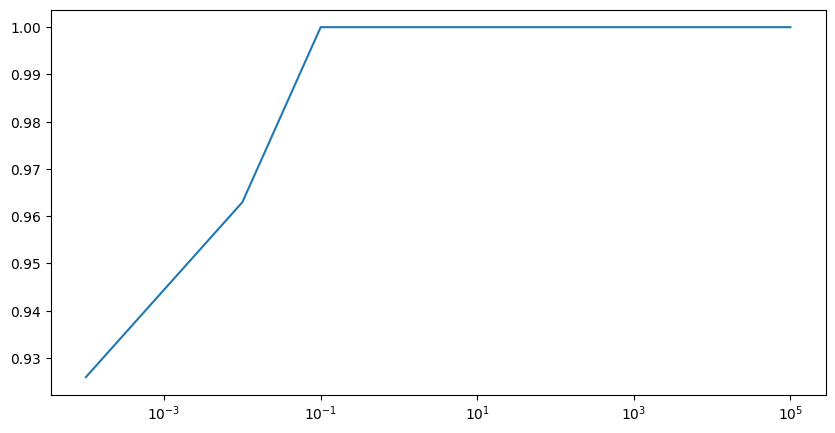

In [36]:
plt.figure(figsize = (10, 5))

plt.plot(params, score)

plt.xscale('log')

plt.show()

## Lasso VS Ridge
* score graph를 비교해보면 Lasso는 한번에 수렴하지만, Ridge는 단계를 거쳐 수렴하는 것을 확인
* 특성을 선택하기에는 Lasso가 좋고, 모델을 안정적으로 쓰는 데는 Ridge가 좋다.